In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#np.set_printoptions(threshold=np.nan)
pd.options.display.max_columns = None

EXPLORE MERGED AND COMBINED DATASET

In [3]:
superframe=pd.read_csv('C:/Users/bkuro/Documents/Data Cert/CSDA1050_FT/Healthcare/Code/superframe.csv')

C:\Users\bkuro\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,4,8,9,10,11,12,15,16,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
superframe.shape

(108769, 47)

In [5]:
superframe.nunique()

Unnamed: 0                        35452
ADDRESS                             428
ActiveIngredient                    197
BUSNAME                               0
CITY                                292
DOB                                 426
DrugName                            228
EXCLDATE                             80
EXCLTYPE                             14
FIRSTNAME                           265
GENERAL                               6
LASTNAME                            381
MIDNAME                             204
NPI                                 371
REINDATE                              1
SPECIALTY                            49
STATE                                46
UPIN                                140
Unnamed: 0.1                     108724
Unnamed: 0.1.1                    58724
WAIVERDATE                            3
WVRSTATE                              2
ZIP                                 402
bene_count                          326
bene_count_ge65                     242


In [19]:
superframe.head()

,Unnamed: 0,ADDRESS,ActiveIngredient,BUSNAME,CITY,DOB,DrugName,EXCLDATE,EXCLTYPE,FIRSTNAME,GENERAL,LASTNAME,MIDNAME,NPI,REINDATE,SPECIALTY,STATE,UPIN,Unnamed: 0.1,Unnamed: 0.1.1,WAIVERDATE,WVRSTATE,ZIP,bene_count,bene_count_ge65,bene_count_ge65_suppress_flag,description_flag,drug_name,ge65_suppress_flag,generic_name,good,infoYear,key,npi,nppes_provider_city,nppes_provider_first_name,nppes_provider_last_org_name,nppes_provider_state,specialty_description,total_30_day_fill_count,total_30_day_fill_count_ge65,total_claim_count,total_claim_count_ge65,total_day_supply,total_day_supply_ge65,total_drug_cost,total_drug_cost_ge65
0,0,"59 N 600 W, APT F211",OMEGA-3-ACID ETHYL ESTERS,NaN,SALT LAKE CITY,19870728.0,LOVAZA,20161220.0,1128b4,NaN,IND- LIC HC SERV PRO,LI,,0.0,0.0,NURSE/NURSES AIDE,UT,NaN,11738,NaN,0.0,NaN,84116.0,NaN,NaN,*,S,LOVAZA,NaN,OMEGA-3 ACID ETHYL ESTERS,0,13,NaN,1003040478,ENCINO,NaN,MONA TABIB MD INC,CA,Family Practice,23.0,23.0,21,21.0,690,690.0,4445.02,4445.02
1,1,"59 N 600 W, APT F211",NaN,NaN,SALT LAKE CITY,19870728.0,NaN,20161220.0,1128b4,NaN,IND- LIC HC SERV PRO,LI,,0.0,0.0,NURSE/NURSES AIDE,UT,NaN,11739,NaN,0.0,NaN,84116.0,NaN,NaN,*,S,METFORMIN HCL,NaN,METFORMIN HCL,0,13,NaN,1003040478,ENCINO,NaN,MONA TABIB MD INC,CA,Family Practice,14.0,14.0,12,12.0,420,420.0,97.51,97.51
2,2,"59 N 600 W, APT F211",NaN,NaN,SALT LAKE CITY,19870728.0,NaN,20161220.0,1128b4,NaN,IND- LIC HC SERV PRO,LI,,0.0,0.0,NURSE/NURSES AIDE,UT,NaN,11740,NaN,0.0,NaN,84116.0,NaN,NaN,*,S,SIMVASTATIN,NaN,SIMVASTATIN,0,13,NaN,1003040478,ENCINO,NaN,MONA TABIB MD INC,CA,Family Practice,18.0,18.0,16,16.0,540,540.0,120.50,120.50
3,3,"59 N 600 W, APT F211",NaN,NaN,SALT LAKE CITY,19870728.0,NaN,20161220.0,1128b4,NaN,IND- LIC HC SERV PRO,LI,,0.0,0.0,NURSE/NURSES AIDE,UT,NaN,20401,NaN,0.0,NaN,84116.0,NaN,NaN,*,T,EXELON,NaN,RIVASTIGMINE,0,13,NaN,1003074600,BEAR CREEK TOWNSHIP,NaN,GERIATRIC RESEARCH & CONSULTING GROUP LLC,PA,Family Medicine,12.0,12.0,12,12.0,360,360.0,3648.73,3648.73
4,4,"59 N 600 W, APT F211",NaN,NaN,SALT LAKE CITY,19870728.0,NaN,20161220.0,1128b4,NaN,IND- LIC HC SERV PRO,LI,,0.0,0.0,NURSE/NURSES AIDE,UT,NaN,20402,NaN,0.0,NaN,84116.0,NaN,NaN,*,T,NAMENDA,NaN,MEMANTINE HCL,0,13,NaN,1003074600,BEAR CREEK TOWNSHIP,NaN,GERIATRIC RESEARCH & CONSULTING GROUP LLC,PA,Family Medicine,12.0,12.0,12,12.0,344,344.0,3073.67,3073.67


In [6]:
#Target variable
freq_table = pd.Series(superframe['good']).value_counts()
print(freq_table)

1    58726
0    50043
Name: good, dtype: int64


In [21]:
superframe.isnull().sum() ###MISSING VALUE TREATMENT ON THE DATA COLLAPSED BY GENERIC DRUG NAME

Unnamed: 0                            0
ADDRESS                           58726
ActiveIngredient                 100190
BUSNAME                          108769
CITY                              58726
DOB                               58726
DrugName                         100190
EXCLDATE                          58726
EXCLTYPE                          58726
FIRSTNAME                         63244
GENERAL                           58726
LASTNAME                          58726
MIDNAME                           58726
NPI                               58726
REINDATE                          58726
SPECIALTY                         58726
STATE                             58726
UPIN                              95430
Unnamed: 0.1                          0
Unnamed: 0.1.1                    50043
WAIVERDATE                        58726
WVRSTATE                         107916
ZIP                               58726
bene_count                        68894
bene_count_ge65                   92321


In [22]:
superframe.dtypes

Unnamed: 0                         int64
ADDRESS                           object
ActiveIngredient                  object
BUSNAME                          float64
CITY                              object
DOB                              float64
DrugName                          object
EXCLDATE                         float64
EXCLTYPE                          object
FIRSTNAME                         object
GENERAL                           object
LASTNAME                          object
MIDNAME                           object
NPI                              float64
REINDATE                         float64
SPECIALTY                         object
STATE                             object
UPIN                              object
Unnamed: 0.1                       int64
Unnamed: 0.1.1                   float64
WAIVERDATE                       float64
WVRSTATE                          object
ZIP                              float64
bene_count                       float64
bene_count_ge65 

EXPLORE NUMERIC ATTRIBUTES

In [43]:
import numpy as np
num_cols = (superframe[['total_30_day_fill_count','total_claim_count','total_day_supply','total_drug_cost']])
num_cols.astype(float)
num_cols = np.log(num_cols[['total_30_day_fill_count','total_claim_count','total_day_supply','total_drug_cost']].replace(0, np.nan))
num_cols.describe()

,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost
count,108769.000000,108769.000000,108769.000000,108769.000000
mean,3.658023,3.436109,6.875828,6.793599
std,0.982161,0.915529,1.138812,1.590080
min,2.397895,2.397895,2.197225,-2.120264
25%,2.890372,2.708050,6.093570,5.607932
50%,3.465736,3.218876,6.753438,6.606096
75%,4.234107,3.951244,7.560080,7.874256
max,9.513773,9.510371,11.865644,15.064669


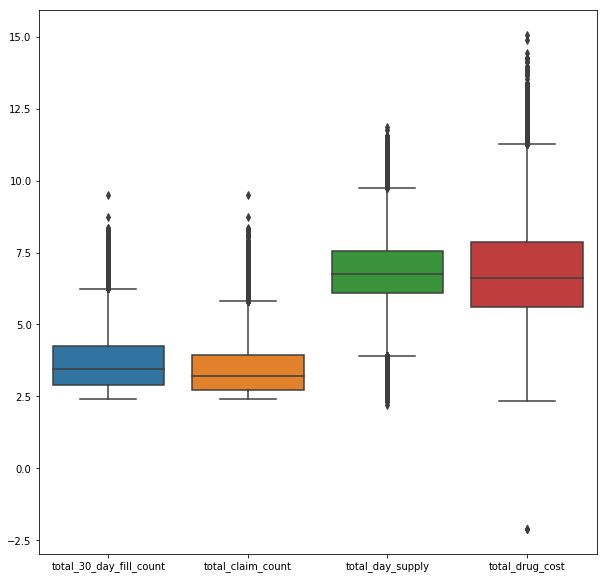

In [44]:
#box plots
import seaborn as sns
fig = plt.figure(figsize=(10,10))
sns.boxplot(data=num_cols)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B3D6C85C0>,
      dtype=object)

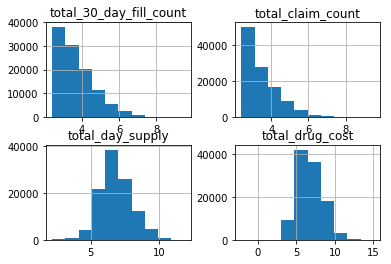

In [45]:
#histograms
num_cols.hist()
#not normal distributions & presence of outliers

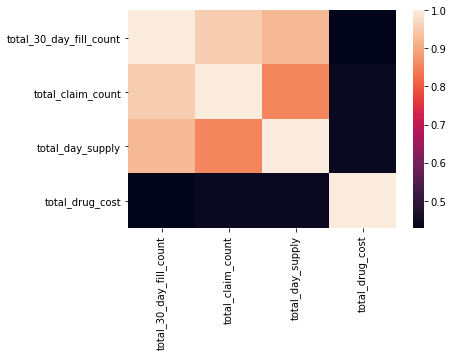

In [46]:
corr = num_cols.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

EXPLORE CATEGORICAL VARIABLES

In [52]:
#filter into 2 separate dfs for good and bad in order to compare visualizations between the groups
goodtotal=superframe[superframe['good']==1] #not on excluded list
badtotal=superframe[superframe['good']==0] #on excluded list

In [53]:
#Next we look at specialty_description w.r.t. our Target Variable "good"
crosstab1=pd.crosstab(superframe.specialty_description, superframe.good, margins=True, normalize='index')

<Figure size 432x288 with 0 Axes>

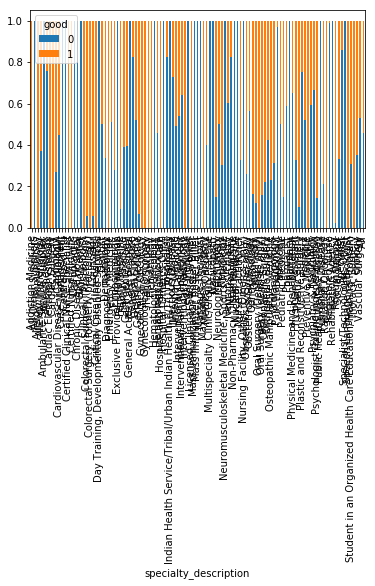

In [54]:
plt.figure()
crosstab1.plot.bar(stacked=True);  #too hard to read with all specialties shown - how to show only top 10????

COUNT OF SPECIALTY

Text(0.5,1,'Specialities Associated with Excluded Practitioners')

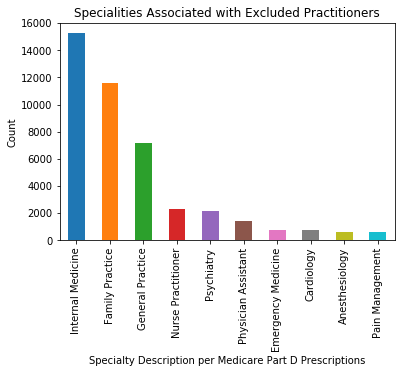

In [30]:
freq_table_1a = pd.Series(badtotal['specialty_description']).value_counts()
freq_table_1a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Specialty Description per Medicare Part D Prescriptions')
plt.ylabel('Count')
plt.title('Specialities Associated with Excluded Practitioners')

Text(0.5,1,'Specialities Associated with Excluded Practitioners')

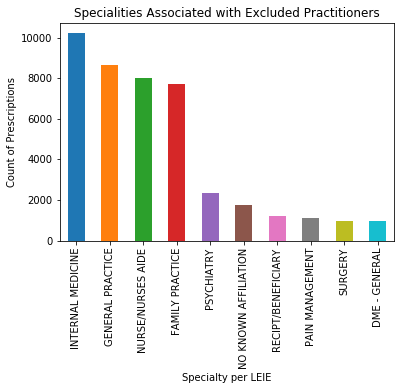

In [31]:
freq_table_1b = pd.Series(badtotal['SPECIALTY']).value_counts()
freq_table_1b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Specialty per LEIE')
plt.ylabel('Count of Prescriptions')
plt.title('Specialities Associated with Excluded Practitioners')

Text(0.5,1,'Specialities Associated with Non-Excluded Practitioners')

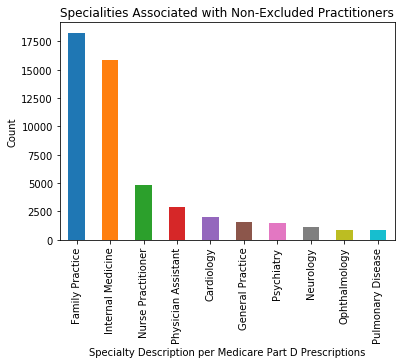

In [32]:
freq_table_1c = pd.Series(goodtotal['specialty_description']).value_counts()
freq_table_1c.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Specialty Description per Medicare Part D Prescriptions')
plt.ylabel('Count')
plt.title('Specialities Associated with Non-Excluded Practitioners')

Text(0.5,1,'States Associated with Excluded Practitioners')

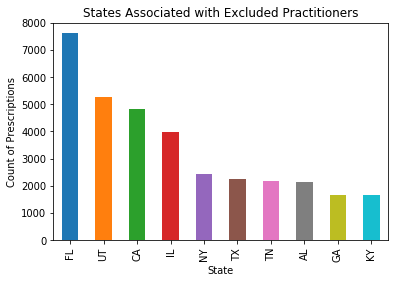

In [33]:
freq_table_2a = pd.Series(badtotal['STATE']).value_counts()
freq_table_2a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count of Prescriptions')
plt.title('States Associated with Excluded Practitioners')
#most in Florida

Text(0.5,1,'States Associated with Non-Excluded Practitioners')

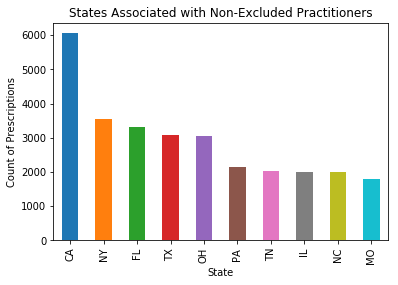

In [34]:
freq_table_2b = pd.Series(goodtotal['nppes_provider_state']).value_counts()
freq_table_2b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count of Prescriptions')
plt.title('States Associated with Non-Excluded Practitioners')
#most in California

In [55]:
badtotal["first_last"]=badtotal["FIRSTNAME"]+badtotal["LASTNAME"]

C:\Users\bkuro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
goodtotal["first_last"]=goodtotal["nppes_provider_first_name"]+goodtotal["nppes_provider_last_org_name"]

C:\Users\bkuro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Excluded Practitioners')

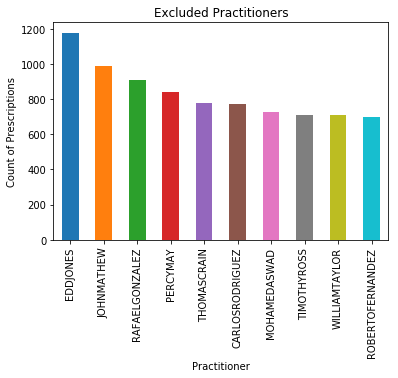

In [57]:
freq_table_3a = pd.Series(badtotal['first_last']).value_counts()
freq_table_3a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Practitioner')
plt.ylabel('Count of Prescriptions')
plt.title('Excluded Practitioners')

Text(0.5,1,'Non-Excluded Practitioners')

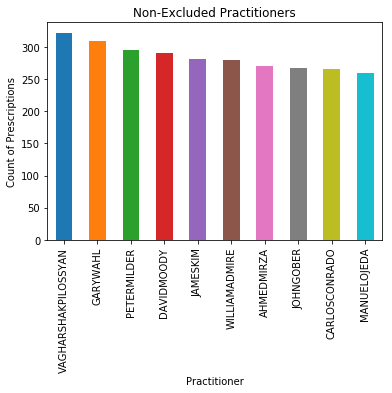

In [58]:
freq_table_3b = pd.Series(goodtotal['first_last']).value_counts()
freq_table_3b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Practitioner')
plt.ylabel('Count of Prescriptions')
plt.title('Non-Excluded Practitioners')

Text(0.5,1,'Prescribed Drugs of Excluded Practitioners')

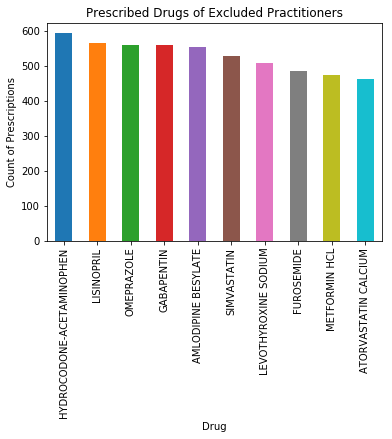

In [59]:
freq_table_4a = pd.Series(badtotal['drug_name']).value_counts()
freq_table_4a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Drug')
plt.ylabel('Count of Prescriptions')
plt.title('Prescribed Drugs of Excluded Practitioners')

Text(0.5,1,'Prescribed Drugs of Non-Excluded Practitioners')

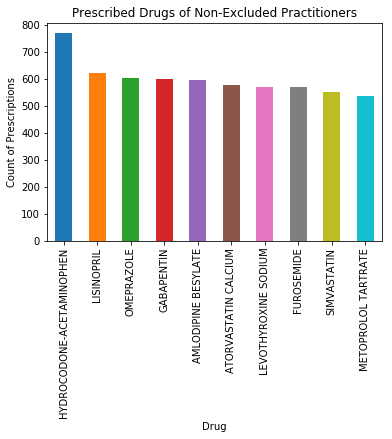

In [44]:
freq_table_4b = pd.Series(goodtotal['drug_name']).value_counts()
freq_table_4b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Drug')
plt.ylabel('Count of Prescriptions')
plt.title('Prescribed Drugs of Non-Excluded Practitioners')

Text(0.5,1,'Active Ingredient in Drugs Prescribed by Excluded Practitioners')

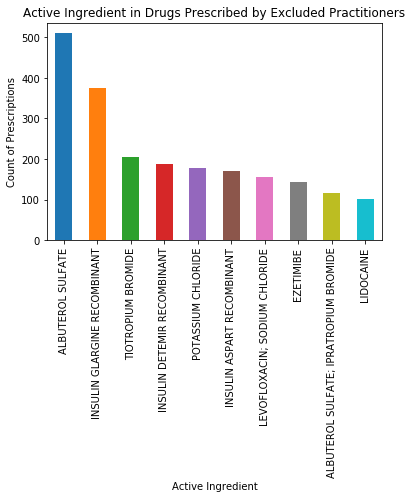

In [61]:
freq_table_5a = pd.Series(badtotal['ActiveIngredient']).value_counts()
freq_table_5a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Active Ingredient')
plt.ylabel('Count of Prescriptions')
plt.title('Active Ingredient in Drugs Prescribed by Excluded Practitioners')

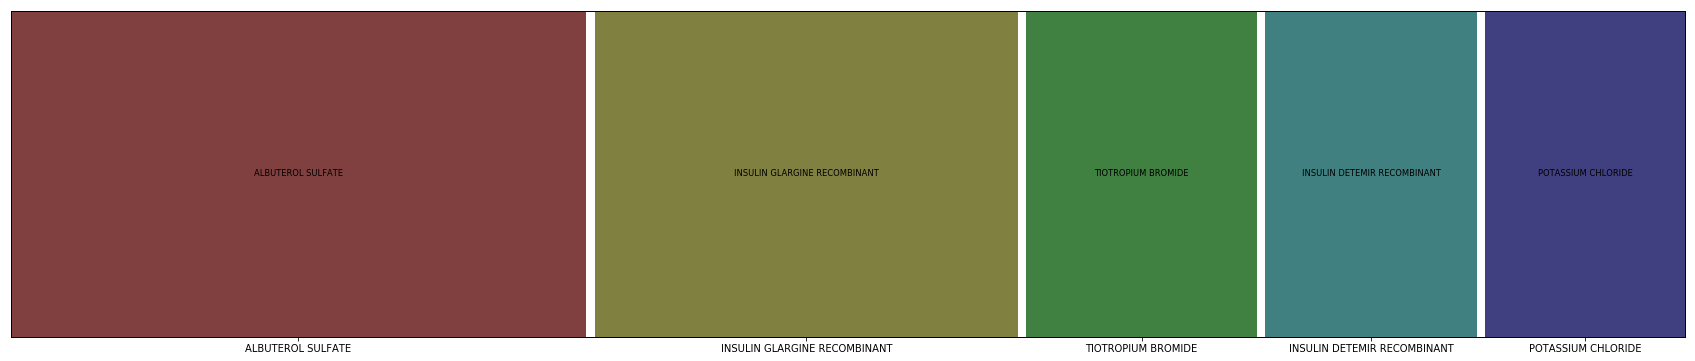

In [62]:
import statsmodels.graphics.mosaicplot as mp
fig = plt.figure(figsize=(30,6))
ax = fig.add_subplot(111)
mp.mosaic(freq_table_5a.sort_values(ascending=False)[:5], ax=ax);

Text(0.5,1,'Active Ingredient in Drugs Prescribed by Non-Excluded Practitioners')

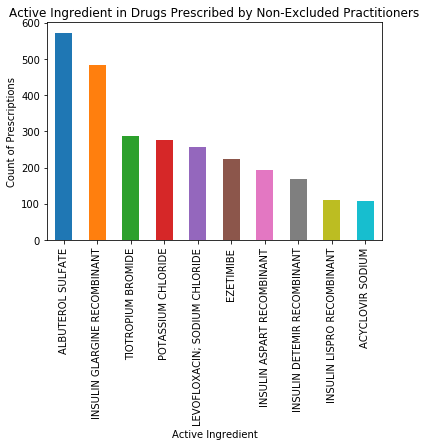

In [47]:
freq_table_5b = pd.Series(goodtotal['ActiveIngredient']).value_counts()
freq_table_5b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Active Ingredient')
plt.ylabel('Count of Prescriptions')
plt.title('Active Ingredient in Drugs Prescribed by Non-Excluded Practitioners')

In [63]:
crosstab_1 = pd.crosstab(superdata.infoYear, superdata.good, margins=True, normalize='index')
crosstab_1.plot.bar()

NameError: name 'superdata' is not defined

EXPLORE THE COLLAPSED DATASET

In [88]:
df_new=pd.read_csv('C:/Users/bkuro/Documents/Data Cert/CSDA1050_FT/Healthcare/Code/DataCollaspedbyGenericPerDoctor.csv')

C:\Users\bkuro\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
df_new.shape

(78231, 30)

In [89]:
num_cols2 = df_new[['total_30_day_fill_count','total_claim_count','total_day_supply','total_drug_cost']]
num_cols2 = np.log(num_cols2)
num_cols2.describe()

,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost
count,78231.000000,78231.000000,78231.000000,78231.000000
mean,3.819313,3.588396,7.020218,6.921692
std,1.095539,1.030962,1.262644,1.672465
min,2.397895,2.397895,2.197225,-2.120264
25%,2.944439,2.708050,6.109248,5.659273
50%,3.610918,3.332205,6.897705,6.740697
75%,4.478473,4.189655,7.807917,8.050785
max,9.665078,9.664278,12.982476,15.355543


MISSING VALUES

In [90]:
df_new.isnull().sum()

npi                                 0
generic_name                        0
ADDRESS                         54526
ActiveIngredient                72404
BUSNAME                         78231
DOB                             54526
DrugName                        72404
EXCLDATE                        54526
EXCLTYPE                        54526
GENERAL                         54526
REINDATE                        54526
WAIVERDATE                      54526
WVRSTATE                        77964
ZIP                             54526
description_flag                    0
drug_name                           0
generic_name.1                      0
good                                0
infoYear                            0
key                              3011
npi.1                               0
nppes_provider_city                 3
nppes_provider_first_name        2305
nppes_provider_last_org_name      703
nppes_provider_state                0
specialty_description               0
total_30_day

In [50]:
!pip install missingno

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


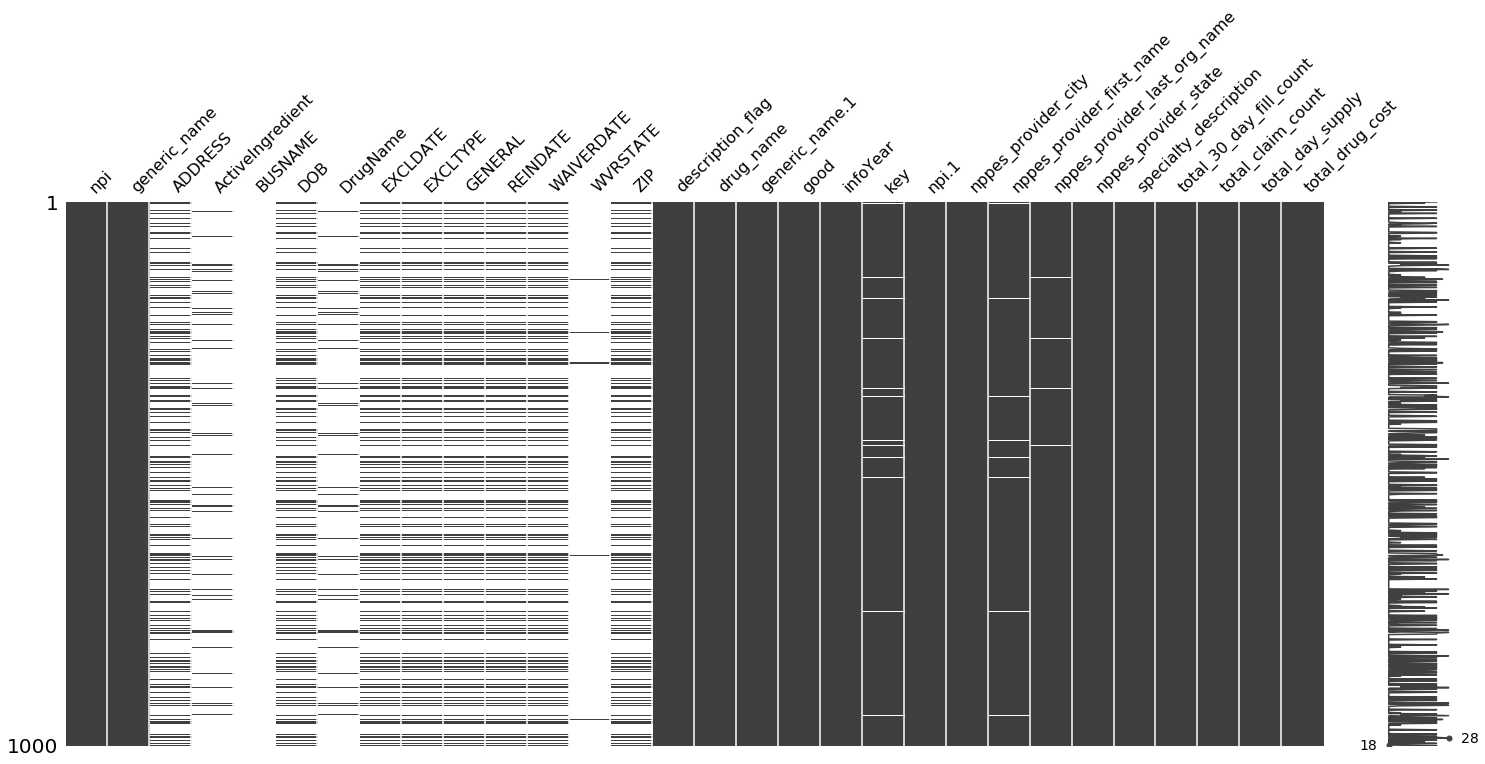

In [68]:
import missingno as msno
msno.matrix(df_new.sample(1000))

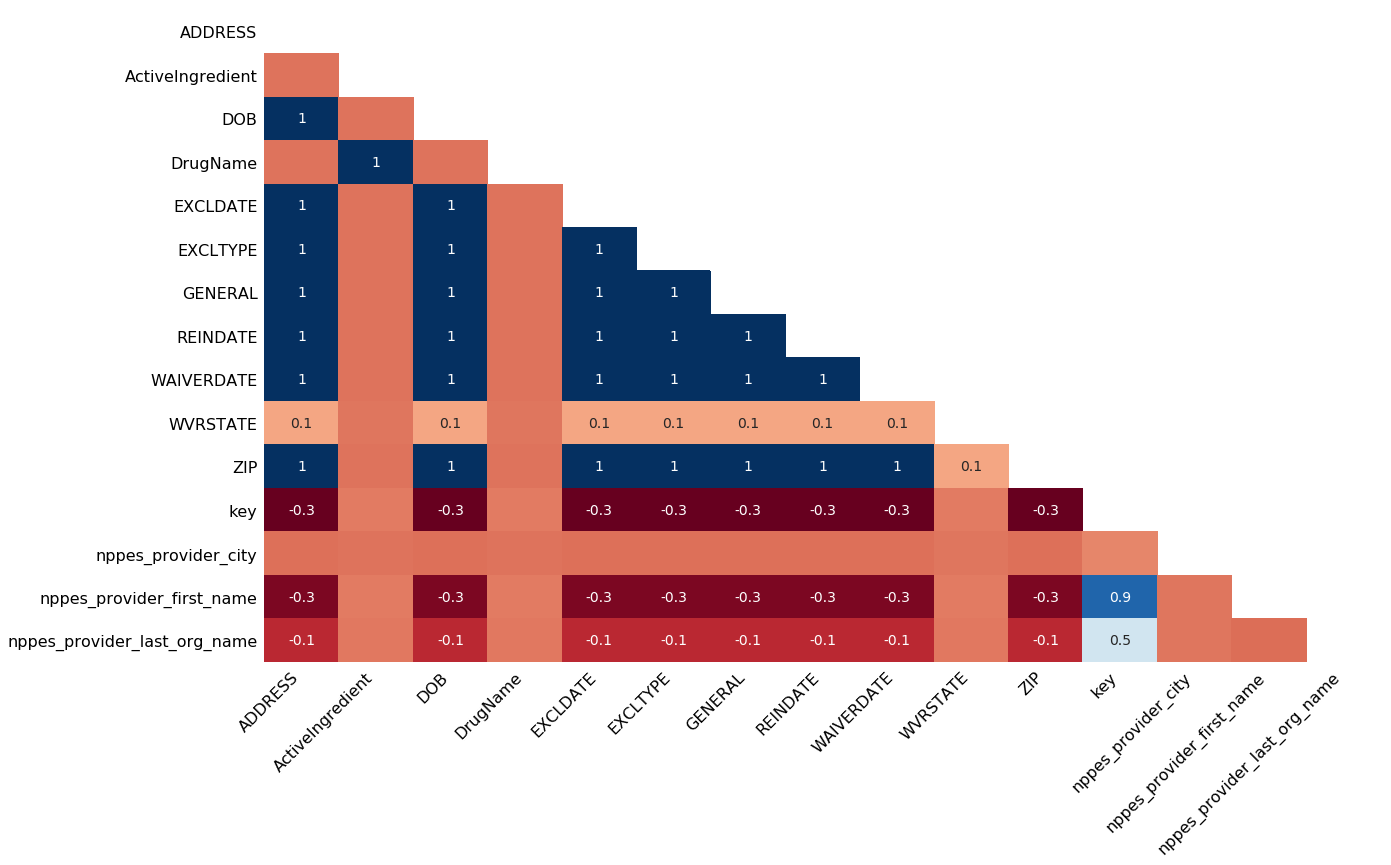

In [69]:
msno.heatmap(df_new)

In [70]:
df_new['REINDATE'].isnull().sum()

54526

In [71]:
(df_new['REINDATE'] == 0).sum(axis=0)

23705

In [72]:
df_new['WAIVERDATE'].isnull().sum()

54526

In [73]:
(df_new['WAIVERDATE'] == 0).sum(axis=0)

23438

In [74]:
df_new1=df_new.drop(['DrugName','npi.1','generic_name.1','REINDATE','WAIVERDATE','WVRSTATE', 'BUSNAME','ADDRESS'],axis='columns')

In [91]:
df_new2=df_new1.dropna(subset=['key'])


In [92]:
df_new2.shape

(75220, 22)

In [93]:
df_new2.isnull().sum()

npi                                 0
generic_name                        0
ActiveIngredient                69576
DOB                             54526
EXCLDATE                        54526
EXCLTYPE                        54526
GENERAL                         54526
ZIP                             54526
description_flag                    0
drug_name                           0
good                                0
infoYear                            0
key                                 0
nppes_provider_city                 0
nppes_provider_first_name           0
nppes_provider_last_org_name        0
nppes_provider_state                0
specialty_description               0
total_30_day_fill_count             0
total_claim_count                   0
total_day_supply                    0
total_drug_cost                     0
dtype: int64

In [94]:
num_cols2 = df_new2[['total_30_day_fill_count','total_claim_count','total_day_supply','total_drug_cost']]
num_cols2 = np.log(num_cols2)
num_cols2.describe()


,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost
count,75220.000000,75220.000000,75220.000000,75220.000000
mean,3.836068,3.605097,7.041177,6.948763
std,1.094312,1.032044,1.255986,1.665871
min,2.397895,2.397895,2.197225,-2.120264
25%,2.944439,2.772589,6.152733,5.693185
50%,3.637586,3.367296,6.927558,6.766768
75%,4.499810,4.219508,7.824846,8.071331
max,9.665078,9.664278,12.982476,15.355543


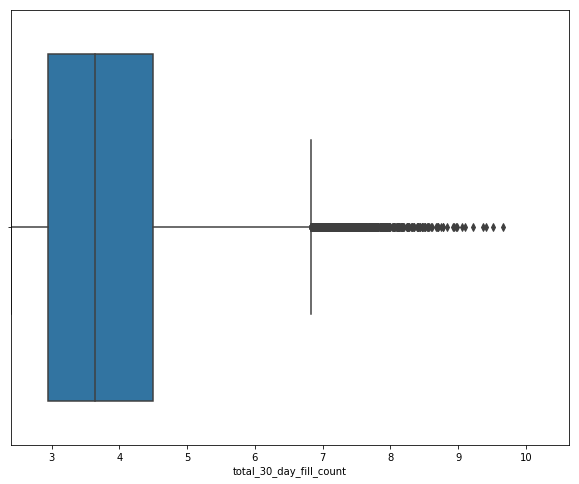

In [95]:
i = 'total_30_day_fill_count'
df=num_cols2
plt.figure(figsize=(10,8))
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

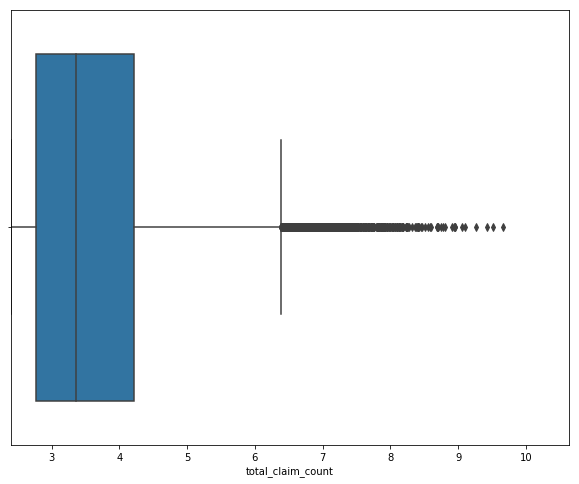

In [96]:
j = 'total_claim_count'
df=num_cols2
plt.figure(figsize=(10,8))
plt.xlim(df[j].min(), df[j].max()*1.1)
sns.boxplot(x=df[j])

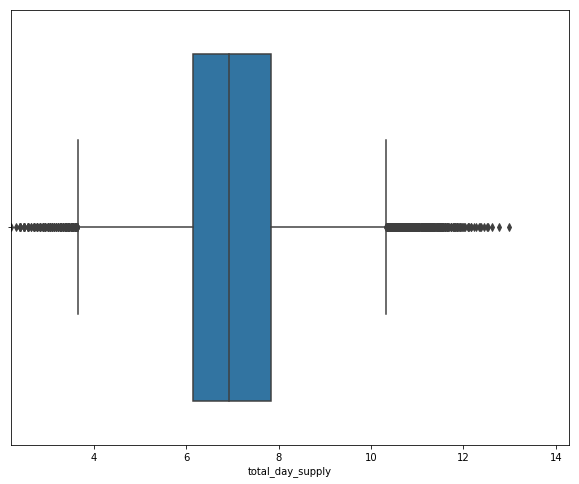

In [97]:
k = 'total_day_supply'
df=num_cols2
plt.figure(figsize=(10,8))
plt.xlim(df[k].min(), df[k].max()*1.1)
sns.boxplot(x=df[k])

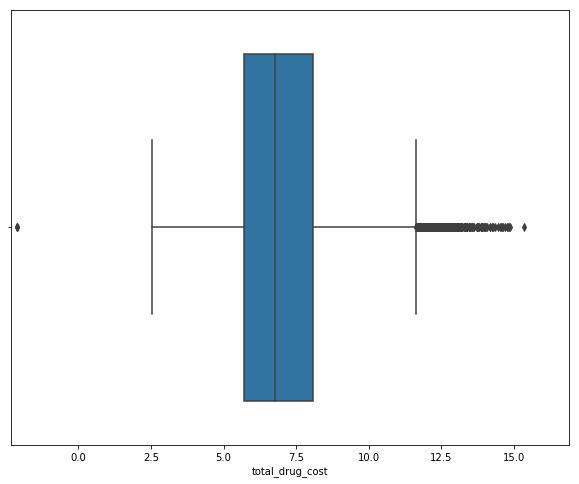

In [99]:
l = 'total_drug_cost'
df=num_cols2
plt.figure(figsize=(10,8))
plt.xlim(df[l].min()*1.1, df[l].max()*1.1)
sns.boxplot(x=df[l])

In [27]:
df_new2.dtypes

npi                               int64
generic_name                     object
ActiveIngredient                 object
DOB                             float64
EXCLDATE                        float64
EXCLTYPE                         object
GENERAL                          object
ZIP                             float64
description_flag                 object
drug_name                        object
good                              int64
infoYear                          int64
key                              object
nppes_provider_city              object
nppes_provider_first_name        object
nppes_provider_last_org_name     object
nppes_provider_state             object
specialty_description            object
total_30_day_fill_count         float64
total_claim_count                 int64
total_day_supply                  int64
total_drug_cost                 float64
dtype: object

In [28]:
# convert to correct data types
df_new2['DOB']=pd.to_datetime(df_new2['DOB'].astype(str),format='%Y%m%d')
df_new2['EXCLDATE']=pd.to_datetime(df_new2['EXCLDATE'].astype(str),format='%Y%m%d')

C:\Users\jpano\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jpano\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
#check conversion is correct
(df_new2['EXCLDATE'].tail())
(df_new2['DOB'].tail())

78226          NaT
78227          NaT
78228   1960-09-26
78229          NaT
78230          NaT
Name: DOB, dtype: datetime64[ns]

In [30]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75220 entries, 0 to 78230
Data columns (total 22 columns):
npi                             75220 non-null int64
generic_name                    75220 non-null object
ActiveIngredient                5644 non-null object
DOB                             20694 non-null datetime64[ns]
EXCLDATE                        20694 non-null datetime64[ns]
EXCLTYPE                        20694 non-null object
GENERAL                         20694 non-null object
ZIP                             20694 non-null float64
description_flag                75220 non-null object
drug_name                       75220 non-null object
good                            75220 non-null int64
infoYear                        75220 non-null int64
key                             75220 non-null object
nppes_provider_city             75220 non-null object
nppes_provider_first_name       75220 non-null object
nppes_provider_last_org_name    75220 non-null object
nppes_provider

In [32]:
df_new2.to_csv('df_new2.csv')

MODELLING

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [164]:
X_train, X_test, y_train, y_test = train_test_split(df_new2, df_new2['good'], test_size=0.30)

DECISION TREE

In [167]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

ValueError: could not convert string to float: 'Internal Medicine'